<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_3/blob/main/Proyecto_16_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Reto Entrega 1**

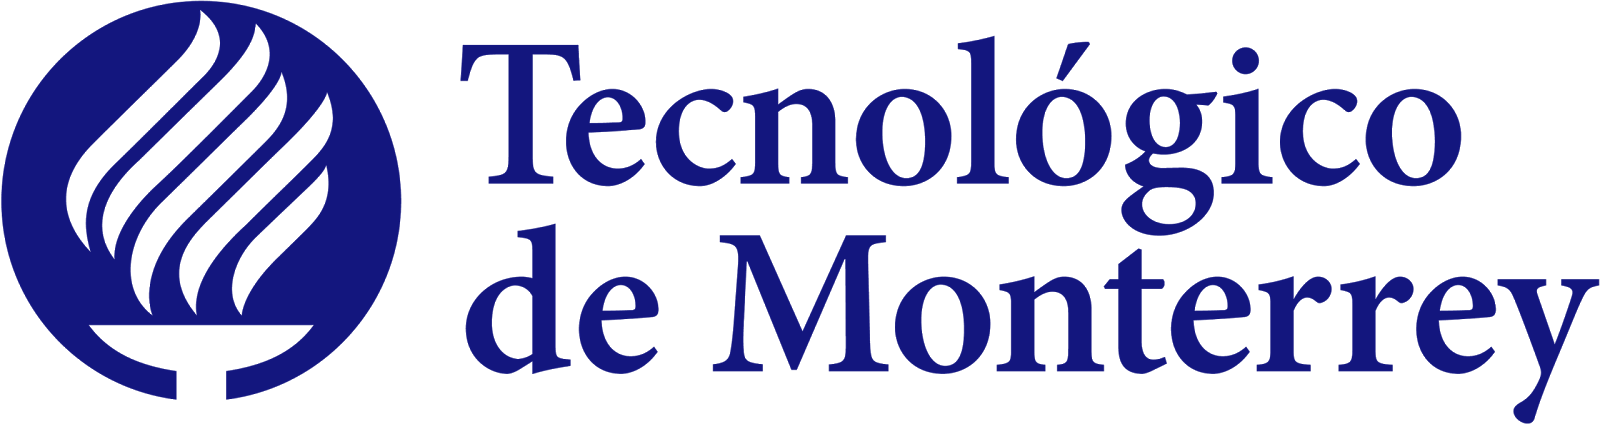

*   **Alumnos:** Julio Osvaldo Hernández Bucio y Juan Antonio Melendres Villa
*   **Matrícula:** A017944366 y A00369017
*   **Equipo:** 3
*   **Materia:** Ciencia y analítica de datos (Gpo 10)
*   **Profesor:** María de la Paz Rico Fernández.
*   **Fecha:** 16 de Noviembre de 2022

**Importamos librerias e instalamos paquetes**

In [1]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 17.7 MB/s 
     |████████████████████████████████| 16.7 MB 57.5 MB/s 
     |████████████████████████████████| 6.3 MB 9.3 MB/s 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

import geopandas
import geopandas as gpd
import pandas as pd

from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
import math

# Limpieza de base de datos.

**Importamos la base de datos a utilizar**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_3/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv', encoding='latin1')
df.sample(10)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
3595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2476,OCLSP3692,LAGUNA CAJITITLAN I,LERMA SANTIAGO PACIFICO,JALISCO,TLAJOMULCO DE ZUÑIGA,RIO SANTIAGO 1,LAGUNA CAJITITLAN,LENTICO (HUMEDAL),LAGO,-103.34270,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
934,DLMIC1710,RIO EL SILENCIO (AGUAS ARRIBA),BALSAS,MICHOACAN DE OCAMPO,SALVADOR ESCALANTE,RIO ZIRAHUEN,RIO EL SILENCIO,LOTICO,RIO,-101.71204,...,"DQO,CF,E_COLI,",SI,NO,SI,NO,NO,ND,SI,SI,LOTICO
219,DLCOA505,AREA DE PROTECCION DE FLORA Y FAUNA CUATRO CIE...,RIO BRAVO,COAHUILA DE ZARAGOZA,CUATRO CIENEGAS,RIO NADADORES,CUATRO CIENEGAS,LENTICO (HUMEDAL),LAGO,-102.13817,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO
1304,DLQUI2201,PLAYA MAYA,PENINSULA DE YUCATAN,QUINTANA ROO,TULUM,YUCATAN (RESTO DE RH 32),MAR CARIBE,COSTERO,BAHIA,-87.43167,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2018,OCGCE3170,PUENTE CUAUHTEMOC-HUILOAPAN B,GOLFO CENTRO,VERACRUZ DE IGNACIO DE LA LLAVE,HUILOAPAN DE CUAUHTEMOC,RIO BLANCO,RIO BLANCO,LOTICO A - Tipo 5,RIO,-97.16110,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
874,DLMIC1623,RIO COAHUAYANA 1,LERMA SANTIAGO PACIFICO,COLIMA,TECOMAN,COAHUAYANA 2,RIO COAHUAYANA,LOTICO - COSTERO (HUMEDAL),RIO,-103.73837,...,"SST,CF,",SI,SI,NO,NO,SI,ND,SI,SI,COSTERO
2365,OCGNO3549W1,LA PESCA,GOLFO NORTE,TAMAULIPAS,SOTO LA MARINA,ARROYOS CALANCHE-VENADOS,RIO SOTO LA MARINA,LOTICO - COSTERO (HUMEDAL),ESTUARIO,-97.73766,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
1163,DLPUE2001,RIO NECAXA 1,GOLFO CENTRO,PUEBLA,ZIHUATEUTLA,RIO TECOLUTLA,RIO NECAXA,LOTICO,RIO,-97.89157,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
2420,OCGNO3619,"RIO TANCOCHIN, DESEMBOCADURA",GOLFO NORTE,VERACRUZ DE IGNACIO DE LA LLAVE,TAMALIN,RIO TANCOCHIN,RIO TANCOCHIN,LOTICO - COSTERO (HUMEDAL),ESTUARIO,-97.51450,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


Creamos un array de index

In [4]:
index = np.arange(1, 4142, 1)

Podemos eliminar la columna clave y remplazarla con el ID de cada fila

In [5]:
# Find the name of the column by index
n = df.columns[0]

# Drop that column
df.drop(n, axis = 1, inplace = True)

# Put whatever series you want in its place
df[n] = index

Podemos inferir el estado con el dato del municipio en el que se encuentra, eliminamos la columna estado

In [6]:
df = df.drop('ESTADO', axis = 1, inplace = False)

In [7]:
df.head(25)

,SITIO,ORGANISMO_DE_CUENCA,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,CLAVE
0,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,...,SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,1
1,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,2
2,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,3
3,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,4
4,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,5
5,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,22.88000,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,6
6,LOS CABOS 2,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90540,22.88310,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,7
7,LAGUNA TODOS SANTOS - CENTRO DE LA LAGUNA,PENINSULA DE BAJA CALIFORNIA,LA PAZ,TODOS SANTOS,TODOS SANTOS,COSTERO,LAGUNA,-110.23902,23.43930,2020.0,...,ND,ND,SI,ND,ND,NO,NO,SI,COSTERO,8
8,MANANTIAL SAN REGIS,PENINSULA DE BAJA CALIFORNIA,LA PAZ,TODOS SANTOS,TODOS SANTOS,LOTICO,ARROYO,-110.22379,23.45805,2020.0,...,SI,SI,SI,NO,SI,ND,SI,SI,LOTICO,9
9,AGUA CALIENTE II,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SANTIAGO,SANTIAGO,LOTICO,ARROYO,-109.80786,23.43995,2020.0,...,SI,SI,SI,SI,SI,ND,NO,SI,LOTICO,10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SITIO                   3493 non-null   object 
 1   ORGANISMO_DE_CUENCA     3493 non-null   object 
 2   MUNICIPIO               3493 non-null   object 
 3   CUENCA                  3492 non-null   object 
 4   CUERPO DE AGUA          3479 non-null   object 
 5   TIPO                    3493 non-null   object 
 6   SUBTIPO                 3479 non-null   object 
 7   LONGITUD                3493 non-null   float64
 8   LATITUD                 3493 non-null   float64
 9   PERIODO                 3493 non-null   float64
 10  DBO_mg/L                2581 non-null   object 
 11  CALIDAD_DBO             2581 non-null   object 
 12  DQO_mg/L                2581 non-null   object 
 13  CALIDAD_DQO             2581 non-null   object 
 14  SST_mg/L                3489 non-null   

Se puede observar que algunos datos que deberian ser tomados como numericos estan siendo almacenados como object

In [9]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

In [10]:
posibleNumericColumns = []

for colname, coltype in df.dtypes.to_dict().items():
    if coltype ==  'object' : 
      for value in df[colname].values:
        if(has_numbers(str(value))):
          posibleNumericColumns.append(colname)
          break

Verificando los datos podemos observar que las siguientes columnas si pueden ser de tipo object (string), por lo que se remueven de nuestra lista floats

In [11]:
posibleNumericColumns.remove('SITIO')
posibleNumericColumns.remove('CUENCA')
posibleNumericColumns.remove('CUERPO DE AGUA')
posibleNumericColumns.remove('TIPO')

Despues de haber analizado columnas numericas eliminaremos las columnas que tienen todos los valores nulos con base en lo observado en df.info()

In [12]:
df = df.drop('TOX_D_48_FON_UT', axis = 1, inplace = False)
df = df.drop('CALIDAD_TOX_D_48_FON', axis = 1, inplace = False)
df = df.drop('TOX_FIS_FON_15_UT', axis = 1, inplace = False)
df = df.drop('CALIDAD_TOX_FIS_FON_15', axis = 1, inplace = False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SITIO                   3493 non-null   object 
 1   ORGANISMO_DE_CUENCA     3493 non-null   object 
 2   MUNICIPIO               3493 non-null   object 
 3   CUENCA                  3492 non-null   object 
 4   CUERPO DE AGUA          3479 non-null   object 
 5   TIPO                    3493 non-null   object 
 6   SUBTIPO                 3479 non-null   object 
 7   LONGITUD                3493 non-null   float64
 8   LATITUD                 3493 non-null   float64
 9   PERIODO                 3493 non-null   float64
 10  DBO_mg/L                2581 non-null   object 
 11  CALIDAD_DBO             2581 non-null   object 
 12  DQO_mg/L                2581 non-null   object 
 13  CALIDAD_DQO             2581 non-null   object 
 14  SST_mg/L                3489 non-null   

Remplazamos valores de SI o NO con 1 y 0

In [14]:
df['CUMPLE_CON_DBO'] = df['CUMPLE_CON_DBO'].replace('SI',int(1))
df['CUMPLE_CON_DBO'] = df['CUMPLE_CON_DBO'].replace('NO',int(0))
df['CUMPLE_CON_DBO'] = df['CUMPLE_CON_DBO'].replace('ND',np.NaN)

In [15]:
df['CUMPLE_CON_DQO'] = df['CUMPLE_CON_DQO'].replace('SI',int(1))
df['CUMPLE_CON_DQO'] = df['CUMPLE_CON_DQO'].replace('NO',int(0))
df['CUMPLE_CON_DQO'] = df['CUMPLE_CON_DQO'].replace('ND',np.NaN)

In [16]:
df['CUMPLE_CON_SST'] = df['CUMPLE_CON_SST'].replace('SI',int(1))
df['CUMPLE_CON_SST'] = df['CUMPLE_CON_SST'].replace('NO',int(0))
df['CUMPLE_CON_SST'] = df['CUMPLE_CON_SST'].replace('ND',np.NaN)

In [17]:
df['CUMPLE_CON_CF'] = df['CUMPLE_CON_CF'].replace('SI',int(1))
df['CUMPLE_CON_CF'] = df['CUMPLE_CON_CF'].replace('NO',int(0))
df['CUMPLE_CON_CF'] = df['CUMPLE_CON_CF'].replace('ND',np.NaN)

In [18]:
df['CUMPLE_CON_E_COLI'] = df['CUMPLE_CON_E_COLI'].replace('SI',int(1))
df['CUMPLE_CON_E_COLI'] = df['CUMPLE_CON_E_COLI'].replace('NO',int(0))
df['CUMPLE_CON_E_COLI'] = df['CUMPLE_CON_E_COLI'].replace('ND',np.NaN)

In [19]:
df['CUMPLE_CON_ENTEROC'] = df['CUMPLE_CON_ENTEROC'].replace('SI',int(1))
df['CUMPLE_CON_ENTEROC'] = df['CUMPLE_CON_ENTEROC'].replace('NO',int(0))
df['CUMPLE_CON_ENTEROC'] = df['CUMPLE_CON_ENTEROC'].replace('ND',np.NaN)

In [20]:
df['CUMPLE_CON_OD'] = df['CUMPLE_CON_OD'].replace('SI',int(1))
df['CUMPLE_CON_OD'] = df['CUMPLE_CON_OD'].replace('NO',int(0))
df['CUMPLE_CON_OD'] = df['CUMPLE_CON_OD'].replace('ND',np.NaN)

In [21]:
df['CUMPLE_CON_TOX'] = df['CUMPLE_CON_TOX'].replace('SI',int(1))
df['CUMPLE_CON_TOX'] = df['CUMPLE_CON_TOX'].replace('NO',int(0))
df['CUMPLE_CON_TOX'] = df['CUMPLE_CON_TOX'].replace('ND',np.NaN)

Se puede observar que los ultimas registros vienen vacios

In [22]:
df.tail(100)

,SITIO,ORGANISMO_DE_CUENCA,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,CLAVE
4041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4042
4042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043
4043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4044
4044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4045
4045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4137
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4138
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4139
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140


Buscamos el indice del ultimo registro que tiene informacion

In [23]:
indexRow = df.index[df['SITIO'] == 'RIO BRAVO 8 (PASO DE LOS INDIOS)']
indexRow

Int64Index([3492], dtype='int64')

In [24]:
df.loc[3492:].isnull().sum()

SITIO                     648
ORGANISMO_DE_CUENCA       648
MUNICIPIO                 648
CUENCA                    648
CUERPO DE AGUA            648
TIPO                      648
SUBTIPO                   648
LONGITUD                  648
LATITUD                   648
PERIODO                   648
DBO_mg/L                  648
CALIDAD_DBO               648
DQO_mg/L                  648
CALIDAD_DQO               648
SST_mg/L                  648
CALIDAD_SST               648
COLI_FEC_NMP_100mL        648
CALIDAD_COLI_FEC          648
E_COLI_NMP_100mL          648
CALIDAD_E_COLI            648
ENTEROC_NMP_100mL         649
CALIDAD_ENTEROC           649
OD_PORC                   648
CALIDAD_OD_PORC           648
OD_PORC_SUP               649
CALIDAD_OD_PORC_SUP       649
OD_PORC_MED               649
CALIDAD_OD_PORC_MED       649
OD_PORC_FON               649
CALIDAD_OD_PORC_FON       649
TOX_D_48_UT               648
CALIDAD_TOX_D_48          648
TOX_V_15_UT               648
CALIDAD_TO

In [25]:
4141 - 649

3492

Obtenemos el dataframe sin los registros nulos

In [26]:
df = df.drop(df.index[3493:])

In [27]:
df.shape

(3493, 50)

Empezamos la conversion de las columnas objeto que deberian ser float con una converstion tipo string, dado el problema del digito '<'

In [28]:
df[posibleNumericColumns] = df[posibleNumericColumns].astype(str)

In [29]:
df.iloc[:, 12:]

,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,CLAVE
0,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,nan,NaN,...,1.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,LENTICO,1
1,nan,NaN,<10,Excelente,nan,NaN,nan,NaN,20,Excelente,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO,2
2,nan,NaN,<10,Excelente,nan,NaN,nan,NaN,<3,Excelente,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO,3
3,nan,NaN,13.9667,Excelente,nan,NaN,nan,NaN,<3,Excelente,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO,4
4,nan,NaN,<10,Excelente,nan,NaN,nan,NaN,30,Excelente,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,<10,Excelente,122,Aceptable,2400,Contaminada,2400,Fuertemente contaminada,nan,NaN,...,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,LOTICO,3489
3489,115.88,Contaminada,54,Buena calidad,2400,Contaminada,4,Excelente,nan,NaN,...,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,LENTICO,3490
3490,87.64,Contaminada,70,Buena calidad,240,Aceptable,15,Excelente,nan,NaN,...,1.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,LOTICO,3491
3491,35.92,Aceptable,56,Buena calidad,2400,Contaminada,11,Excelente,nan,NaN,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,1.0,LOTICO,3492


Creamos una nueva columna con el sufijo Min, esta nueva columna nos indicara si cada valor en las columnas numericas del registro contenia la etiqueta de <  

In [30]:
newNumericColumns = []

In [31]:
for idx, column in enumerate(posibleNumericColumns):

  strNumericColumn = posibleNumericColumns[idx] + 'Min'

  newNumericColumns.append(strNumericColumn)

  df.insert(df.columns.get_loc(posibleNumericColumns[idx]) + 1, strNumericColumn, "")

  df[strNumericColumn] = df[posibleNumericColumns[idx]].str.contains('<')

In [32]:
newNumericColumns

['DBO_mg/LMin',
 'DQO_mg/LMin',
 'SST_mg/LMin',
 'COLI_FEC_NMP_100mLMin',
 'E_COLI_NMP_100mLMin',
 'ENTEROC_NMP_100mLMin',
 'OD_PORCMin',
 'OD_PORC_SUPMin',
 'OD_PORC_MEDMin',
 'OD_PORC_FONMin',
 'TOX_D_48_UTMin',
 'TOX_V_15_UTMin',
 'TOX_D_48_SUP_UTMin',
 'TOX_FIS_SUP_15_UTMin']

Convertimos los valores booelanos de las nuevas columnas Min, 1 para indicar que tenia la etiqueta de '<' y 0 para indicar que es un valor mayor que la metrica 

In [33]:
for column in newNumericColumns:
  df[column] = df[column].astype(int)

Remplazamos los valores que tengan el caracter '<' con el siguiente menor numero en su etiqueta 

In [34]:
for column in posibleNumericColumns:
  
  for index, row in df.iterrows():

    if('<' in row[column]):
      number = row[column].split('<',1)[1]
      numberInt = (pd.to_numeric(number)) - 1
      df.loc[index, column] = str(numberInt)

In [35]:
for column in posibleNumericColumns:
  
  for index, row in df.iterrows():

    if('nan' in str(row[column])):
      df.loc[index, column] = np.nan

Ahora podemos convertir de Object(string) a un valor numerico las columnas para nuestros calculos estadisticos

In [36]:
for column in posibleNumericColumns:

  df[column] = pd.to_numeric(df[column])

In [37]:
df.iloc[:20, :20]

,SITIO,ORGANISMO_DE_CUENCA,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,DBO_mg/LMin,CALIDAD_DBO,DQO_mg/L,DQO_mg/LMin,CALIDAD_DQO,SST_mg/L,SST_mg/LMin,CALIDAD_SST,COLI_FEC_NMP_100mL
0,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6.00,0,Buena calidad,54.08,0,Contaminada,13.7500,0,Excelente,1162.0
1,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,0,NaN,NaN,0,NaN,9.0000,1,Excelente,NaN
2,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,0,NaN,NaN,0,NaN,9.0000,1,Excelente,NaN
3,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,0,NaN,NaN,0,NaN,13.9667,0,Excelente,NaN
4,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,0,NaN,NaN,0,NaN,9.0000,1,Excelente,NaN
5,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,22.88000,2020.0,NaN,0,NaN,NaN,0,NaN,22.0667,0,Excelente,NaN
6,LOS CABOS 2,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90540,22.88310,2020.0,NaN,0,NaN,NaN,0,NaN,13.9667,0,Excelente,NaN
7,LAGUNA TODOS SANTOS - CENTRO DE LA LAGUNA,PENINSULA DE BAJA CALIFORNIA,LA PAZ,TODOS SANTOS,TODOS SANTOS,COSTERO,LAGUNA,-110.23902,23.43930,2020.0,NaN,0,NaN,NaN,0,NaN,57.8500,0,Buena calidad,NaN
8,MANANTIAL SAN REGIS,PENINSULA DE BAJA CALIFORNIA,LA PAZ,TODOS SANTOS,TODOS SANTOS,LOTICO,ARROYO,-110.22379,23.45805,2020.0,1.00,1,Excelente,9.00,1,Excelente,33.9000,0,Buena calidad,3873.0
9,AGUA CALIENTE II,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SANTIAGO,SANTIAGO,LOTICO,ARROYO,-109.80786,23.43995,2020.0,1.00,1,Excelente,9.00,1,Excelente,25.6000,0,Buena calidad,189.0


In [38]:
df.iloc[:20, 20:40]

,COLI_FEC_NMP_100mLMin,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,E_COLI_NMP_100mLMin,CALIDAD_E_COLI,ENTEROC_NMP_100mL,ENTEROC_NMP_100mLMin,CALIDAD_ENTEROC,OD_PORC,OD_PORCMin,CALIDAD_OD_PORC,OD_PORC_SUP,OD_PORC_SUPMin,CALIDAD_OD_PORC_SUP,OD_PORC_MED,OD_PORC_MEDMin,CALIDAD_OD_PORC_MED,OD_PORC_FON,OD_PORC_FONMin,CALIDAD_OD_PORC_FON
0,0,Contaminada,98.0,0,Excelente,NaN,0,NaN,NaN,0,NaN,46.8,0,Aceptable,NaN,0,NaN,NaN,0,NaN
1,0,NaN,NaN,0,NaN,20.0,0,Excelente,NaN,0,NaN,92.0,0,Excelente,95.4,0,Excelente,92.2,0,Excelente
2,0,NaN,NaN,0,NaN,2.0,1,Excelente,NaN,0,NaN,92.0,0,Excelente,95.4,0,Excelente,92.2,0,Excelente
3,0,NaN,NaN,0,NaN,2.0,1,Excelente,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,86.7,0,Excelente
4,0,NaN,NaN,0,NaN,30.0,0,Excelente,NaN,0,NaN,96.2,0,Excelente,95.9,0,Excelente,95.5,0,Excelente
5,0,NaN,NaN,0,NaN,2.0,1,Excelente,NaN,0,NaN,90.1,0,Excelente,95.2,0,Excelente,94.2,0,Excelente
6,0,NaN,NaN,0,NaN,90.0,0,Excelente,NaN,0,NaN,81.9,0,Excelente,82.4,0,Excelente,79.2,0,Excelente
7,0,NaN,NaN,0,NaN,402.0,0,Contaminada,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,146.0,0,Contaminada
8,0,Contaminada,512.0,0,Buena calidad,NaN,0,NaN,83.6,0,Excelente,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
9,0,Buena calidad,2.0,1,Excelente,NaN,0,NaN,137.0,0,Contaminada,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN


In [39]:
df.iloc[:20, 40:60]

,TOX_D_48_UT,TOX_D_48_UTMin,CALIDAD_TOX_D_48,TOX_V_15_UT,TOX_V_15_UTMin,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,TOX_D_48_SUP_UTMin,CALIDAD TOX_D_48_SUP,TOX_FIS_SUP_15_UT,TOX_FIS_SUP_15_UTMin,CALIDAD_TOX_FIS_SUP_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC
0,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,0.0,1,No Toxico,Rojo,"DQO,CF,",1.0,0.0,1.0,0.0,1.0,NaN
1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
2,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
3,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
4,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
5,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
6,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
7,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Rojo,"ENT_FEC,OD%F,",NaN,NaN,1.0,NaN,NaN,0.0
8,0.0,1,No Toxico,0.0,1,No Toxico,NaN,0,NaN,NaN,0,NaN,Amarillo,"CF,",1.0,1.0,1.0,0.0,1.0,NaN
9,0.0,1,No Toxico,0.0,1,No Toxico,NaN,0,NaN,NaN,0,NaN,Amarillo,"OD%L,",1.0,1.0,1.0,1.0,1.0,NaN


# Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

Introduccion a cuartiles y outliers

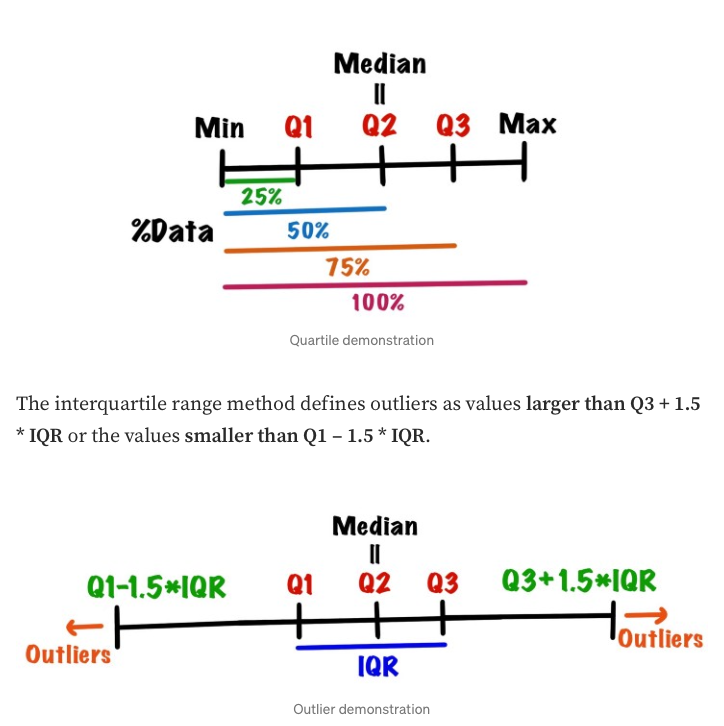

Obtenemos una serie de valores con el subconjunto de la columna DBO_mg/L que no fueron etiquetados como una numero menor a la metrica '<', despues obtenemos su informacion estadistica

In [40]:
print('***Informacion de registros no etiquetados como minimos***')
print('\n')

dfNotMin = pd.DataFrame(columns = posibleNumericColumns)


for column in posibleNumericColumns:

  valuesNotMin = []

  for index, row in df.iterrows():

    if(pd.notnull(row[column]) and (row[column + 'Min'] == 0)): #this tell us that this value was not labeled in the minur range
      
      valuesNotMin.append(row[column])
      
  notMin = pd.Series(pd.to_numeric(valuesNotMin))

  dfNotMin[column] = notMin

  print('Informacion estadistica para ' + column)
  print('----------------------------' + '\n')

  print(notMin.describe())

  print('\n')

  Q1,Q3 = np.percentile(notMin , [25,75]) #Usamos la función percentil para encontrar Q1 y Q3.

  #Luego, podemos calcular IQR y el límite de no valores atípicos. En resumen, IQR es Q3-Q1, 
  #y el límite superior para valores no atípicos es Q3+1.5*IQR, el límite inferior para valores no atípicos es Q1-1.5*IQR.

  IQR = Q3 - Q1
  ul = Q3+1.5*IQR
  ll = Q1-1.5*IQR

  print('Intercuartil: ' + str(IQR))
  print('Primer cuartil: ' + str(Q1))
  print('Tercer cuartil: ' + str(Q3))
  print('Limite inferior outliers: ' + str(ll))
  print('Limite superior outliers: ' + str(ul))

  print('\n')
  

  #Podemos usar la indexación para encontrar los valores atípicos exactos.

  outliers = notMin[(notMin > ul) | (notMin < ll)]
  
  print('Numero de outliers: ' + str(outliers.count()))

  print('\n')
  print('----------------------------')

  print('\n')

***Informacion de registros no etiquetados como minimos***


Informacion estadistica para DBO_mg/L
----------------------------

count    1357.000000
mean       30.313933
std        87.709661
min         2.000000
25%         5.210000
50%         9.000000
75%        22.600000
max      1500.000000
dtype: float64


Intercuartil: 17.39
Primer cuartil: 5.21
Tercer cuartil: 22.6
Limite inferior outliers: -20.875
Limite superior outliers: 48.685


Numero de outliers: 160


----------------------------


Informacion estadistica para DQO_mg/L
----------------------------

count    2022.000000
mean       79.353824
std       166.178590
min        10.000000
25%        21.120000
50%        36.960000
75%        73.285000
max      2871.250000
dtype: float64


Intercuartil: 52.16499999999999
Primer cuartil: 21.12
Tercer cuartil: 73.285
Limite inferior outliers: -57.12749999999998
Limite superior outliers: 151.53249999999997


Numero de outliers: 190


----------------------------


Informacion estadis

Graficaremos los datos mostrados en boxplot, pero primero normalizaremos

In [41]:
x = dfNotMin.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

df2 = pd.DataFrame(x_scaled)

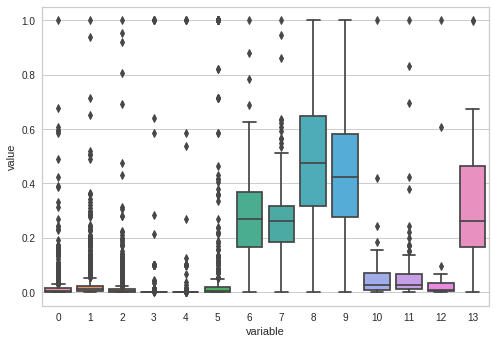

In [42]:
sns.boxplot(x="variable", y="value", data=pd.melt(df2))
plt.show()

In [43]:
df2.columns = posibleNumericColumns

Verifiquemos la correlacion entre las columnas numericas

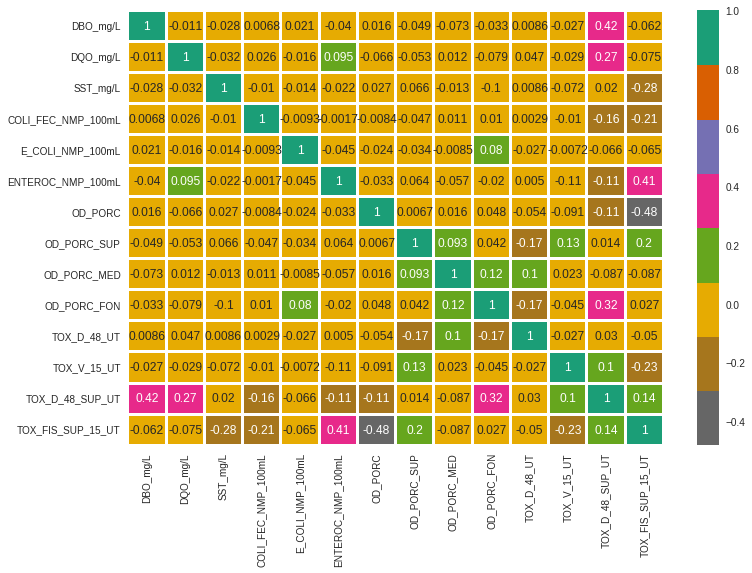

In [44]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df2.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

Obtenemos la misma informacion estadistica para todos los registros **incluyendo los que estaban con una etiqueta de minimo**

In [45]:
print('***Informacion de todos los registros***')
print('\n')

for column in posibleNumericColumns:

  print('Informacion estadistica para ' + column)
  print('----------------------------' + '\n')

  print(df[column].describe())

  df1 = df[df[column].notna()]

  valuesNotNa = df1[column]

  Q1,Q3 = np.percentile(valuesNotNa, [25,75]) #Usamos la función percentil para encontrar Q1 y Q3.

  #Luego, podemos calcular IQR y el límite de no valores atípicos. En resumen, IQR es Q3-Q1, 
  #y el límite superior para valores no atípicos es Q3+1.5*IQR, el límite inferior para valores no atípicos es Q1-1.5*IQR.

  print('\n')

  IQR = Q3 - Q1
  ul = Q3+1.5*IQR
  ll = Q1-1.5*IQR

  print('Intercuartil: ' + str(IQR))
  print('Primer cuartil: ' + str(Q1))
  print('Tercer cuartil: ' + str(Q3))
  print('Limite inferior outliers: ' + str(ll))
  print('Limite superior outliers: ' + str(ul))

  print('\n')
  

  #Podemos usar la indexación para encontrar los valores atípicos exactos.

  outliers = valuesNotNa[(valuesNotNa > ul) | (valuesNotNa < ll)]
  
  print('Numero de outliers: ' + str(outliers.count()))

  print('\n')
  print('----------------------------')

  print('\n')

***Informacion de todos los registros***


Informacion estadistica para DBO_mg/L
----------------------------

count    2581.000000
mean       16.412246
std        65.250508
min         1.000000
25%         1.000000
50%         2.630000
75%        10.000000
max      1500.000000
Name: DBO_mg/L, dtype: float64


Intercuartil: 9.0
Primer cuartil: 1.0
Tercer cuartil: 10.0
Limite inferior outliers: -12.5
Limite superior outliers: 23.5


Numero de outliers: 328


----------------------------


Informacion estadistica para DQO_mg/L
----------------------------

count    2581.000000
mean       64.116402
std       149.907175
min         9.000000
25%        11.870000
50%        27.010000
75%        57.000000
max      2871.250000
Name: DQO_mg/L, dtype: float64


Intercuartil: 45.13
Primer cuartil: 11.87
Tercer cuartil: 57.0
Limite inferior outliers: -55.82500000000001
Limite superior outliers: 124.69500000000001


Numero de outliers: 263


----------------------------


Informacion estadistica pa

In [46]:
x = df[posibleNumericColumns].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

df2 = pd.DataFrame(x_scaled)

df2.columns = posibleNumericColumns

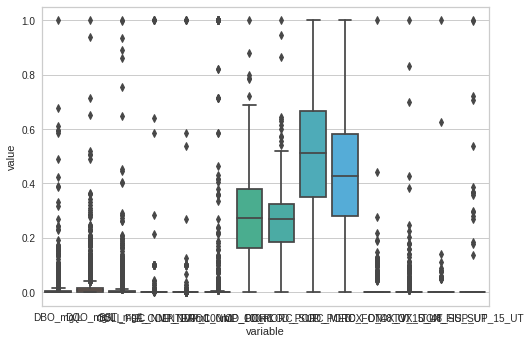

In [47]:
sns.boxplot(x="variable", y="value", data=pd.melt(df2))
plt.show()

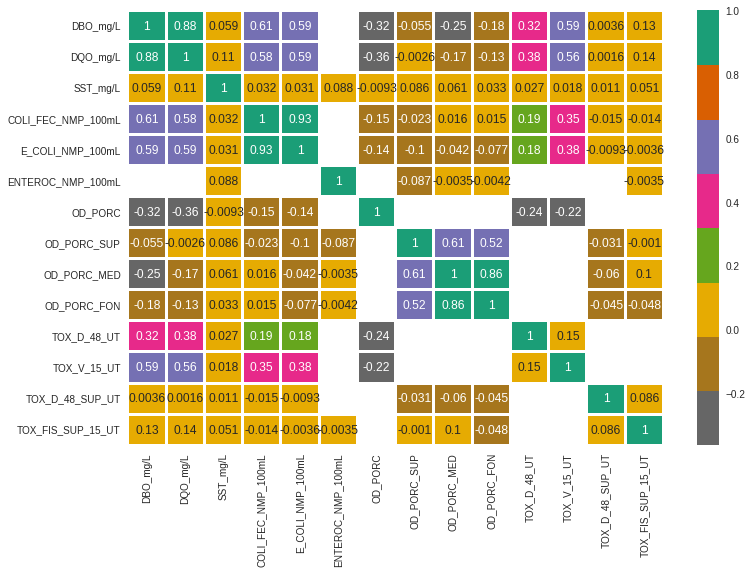

In [48]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df2.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

Podemos ver algunas correlaciones mas fuertes entre las columnas: {OD _PORC_MED, OD_PORC_FON}, {E_COLINMP_100mL, COLI_FEC_NMP_100ml}, {DBO mg/l, DQO_mg/L}, incluyendo valores minimos (con etiqueta de '<')

# **Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.**

En esta sección de código, comenzamos asignando un valor numérico a las variables de salida. 
En este caso fueron: verde = 2, rojo = 1, amarillo = 0

In [49]:
lbe = LabelEncoder()
df["SEMAFORO_Type"] = lbe.fit_transform(df["SEMAFORO"])
df["SEMAFORO_Type"].unique()

array([1, 2, 0])

Comprobación de los nombres numéricos de las variables de salida

In [50]:
df[['SEMAFORO','SEMAFORO_Type']]

,SEMAFORO,SEMAFORO_Type
0,Rojo,1
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
...,...,...
3488,Amarillo,0
3489,Rojo,1
3490,Rojo,1
3491,Amarillo,0


En esta sección, realizaremos las transformaciones necesarias para crear dos GeoDataFrames.

KdfSuperficiales nos ayuda a mapear predicciones de semáforos de clúster. 

gdfSuperficiales nos ayuda a mapear los valores reales del semáforo del clúster.

In [51]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)

KdfSuperficiales = gpd.GeoDataFrame(df, geometry = "Coordinates")
gdfSuperficiales = gpd.GeoDataFrame(df, geometry = "Coordinates")

Obtenemos una variable mundial para que podamos dibujar un mapa de México

In [52]:
mundo = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
mundo = mundo.set_index("iso_a3")

mundo.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

Confirmamos que recibimos los valores correctod para presentar el mapa de México

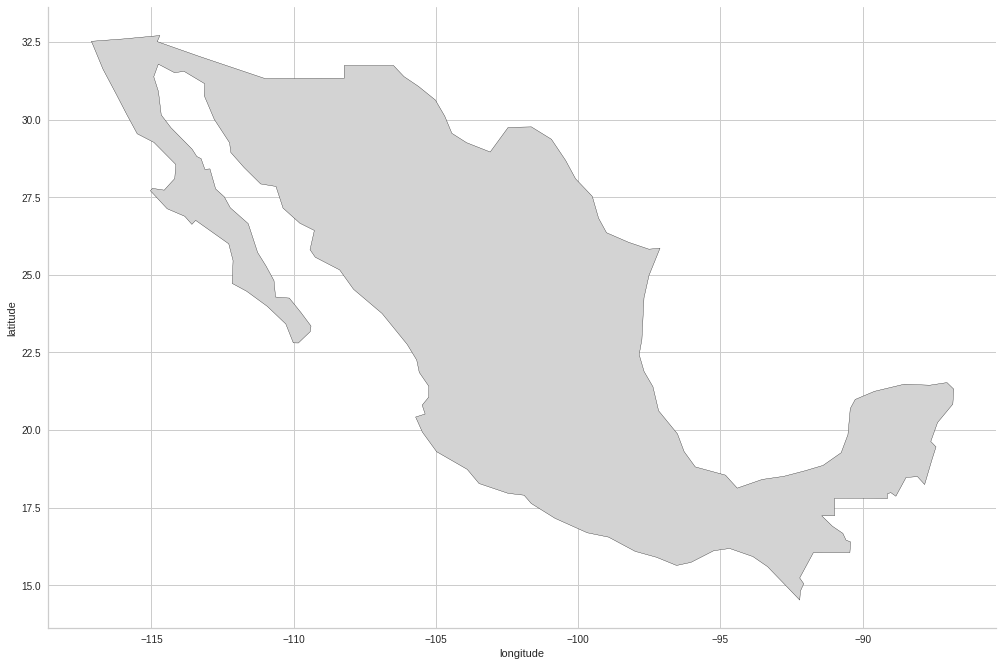

In [53]:
fig, gax = plt.subplots(figsize = (17, 17))

mundo.query("name == 'Mexico'").plot(ax = gax, edgecolor = 'black', color = 'lightGray')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

En esta parte del código, dibujamos las ubicaciones de los cuerpos de agua en azul.

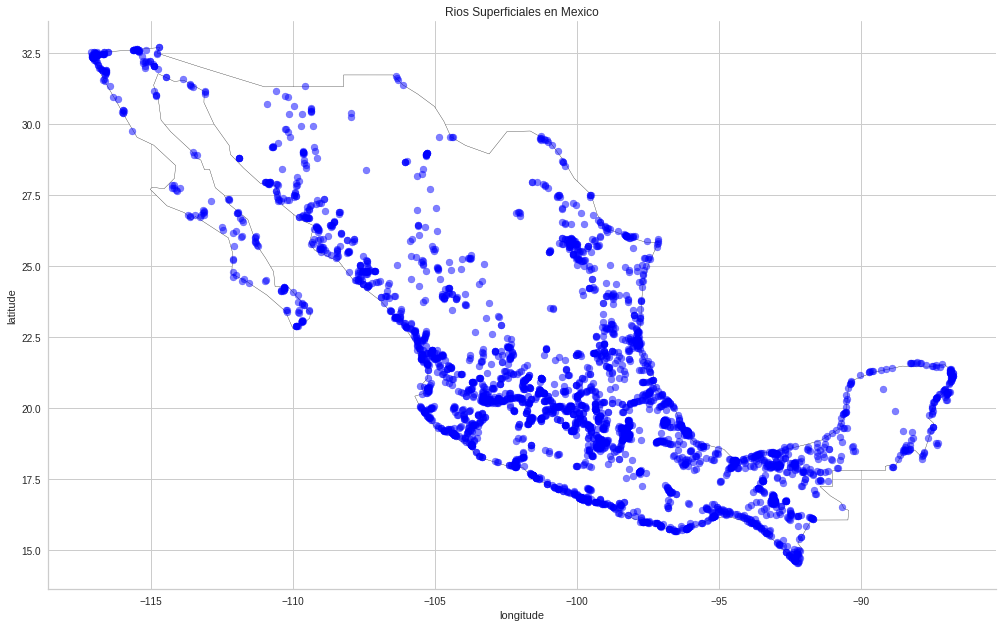

In [54]:
fig, gax = plt.subplots(figsize = (17,17))

mundo.query("name == 'Mexico'").plot(ax = gax, edgecolor = 'black', color = 'white')

KdfSuperficiales.plot(ax = gax, color = 'blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Rios Superficiales en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

# **Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**

Obtenemos nuestras variables de entrada  Kmeans y las usamos para entrenamiento y predicción

In [55]:
X_Coordenadas = df[["LATITUD","LONGITUD"]]
X_Coordenadas

,LATITUD,LONGITUD
0,22.24730,-102.33911
1,22.90473,-109.84290
2,22.89880,-109.86442
3,22.89609,-109.88604
4,22.87694,-109.89657
...,...,...
3488,26.78971,-99.42142
3489,27.43714,-99.53064
3490,27.49901,-99.50727
3491,27.49631,-99.52221


Obtenemos la variable de producto Kmeans y su entrenamiento y predicción.

In [56]:
Y = df[["SEMAFORO_Type"]]
Y

,SEMAFORO_Type
0,1
1,2
2,2
3,2
4,2
...,...
3488,0
3489,1
3490,1
3491,0


Usamos la función make_blobs para aumentar el tamaño del archivo de coordenadas y hacer blobs.

In [57]:
long_lat = list(zip(df.LATITUD, df.LONGITUD))
blob_centers = long_lat

X_Coordenadas_blobs, Y_blobs = make_blobs(n_samples = 3493, centers = blob_centers, cluster_std = 0.20, random_state = 42)

Usamos el modelo KMeans KElbowVisualizar para ayudar a encontrar el mejor valor para k. 

Con el mejor valor de k, determinamos el número de clusters a ofrecer

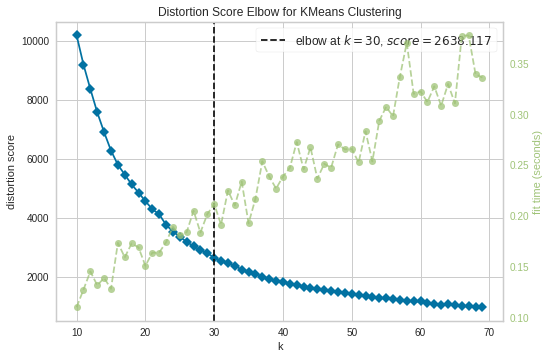

In [58]:
model = KElbowVisualizer(KMeans(), k = (10,70))
model.fit(X_Coordenadas_blobs)
model.show()

Almacenamos el valor de k en una variable, entrenamos y predecimos con coordenadas X, de hecho Y no importa.

In [59]:
k = model.elbow_value_

kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X_Coordenadas, Y)

En esta parte del código, creamos un nuevo marco de datos desde el cual podemos recopilar las N ubicaciones de clústeres resultantes. 

De manera similar, le damos a cada grupo un número de identificación para que podamos indexarlo y consultarlo más adelante.

In [60]:
C = kmeans.cluster_centers_

Cdf = pd.DataFrame(C)
Cdf["Coordinates"] = list(zip(Cdf[1], Cdf[0]))
Cdf["Coordinates"] = Cdf["Coordinates"].apply(Point)

labels = kmeans.predict(X_Coordenadas)

gdfCSuperficiales = gpd.GeoDataFrame(Cdf, geometry = "Coordinates")
gdfCSuperficiales['Numero de Cluster'] = 0
z = 0
while z < k:
  gdfCSuperficiales['Numero de Cluster'][z] = z
  z += 1 # z + 1

gdfCSuperficiales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,0,1,Coordinates,Numero de Cluster
0,19.983565,-99.857764,POINT (-99.85776 19.98356),0
1,26.955628,-112.578254,POINT (-112.57825 26.95563),1
2,15.932988,-92.892535,POINT (-92.89254 15.93299),2
3,20.994410,-103.000208,POINT (-103.00021 20.99441),3
4,24.888982,-107.582663,POINT (-107.58266 24.88898),4
5,24.833880,-98.301737,POINT (-98.30174 24.83388),5
6,20.944526,-87.335133,POINT (-87.33513 20.94453),6
7,32.039858,-114.904824,POINT (-114.90482 32.03986),7
8,18.924367,-96.372446,POINT (-96.37245 18.92437),8
9,18.873404,-98.682674,POINT (-98.68267 18.87340),9


En esta sección, simplemente le damos a la matriz la cantidad de clústeres para que podamos usarla más tarde para los bucles.

In [61]:
numeroAlmacen = list()
for row in gdfCSuperficiales['Numero de Cluster'] :
    numeroAlmacen.append(gdfCSuperficiales['Numero de Cluster'][row])

print(numeroAlmacen)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


En esta sección de código, creamos dos marcos de datos. 

clusters - En este DF tenemos todos los cuerpos de agua con cuatro variables principales: longitud, latitud,  número de clusters que lo tocan y  valor único del semáforo. 

cantidadGrupo - este DF contiene una lista que indica cuántos cuerpos de agua se agrupan en cada uno de los N grupos resultantes.

In [62]:
referencias = []

for z in numeroAlmacen:
  referencias.append(numeroAlmacen[z])
referencias

clusters =  pd.DataFrame()
clusters['Latitud'] = df['LATITUD'].values
clusters['Longitud'] = df['LONGITUD'].values
clusters['NUMCLUSTER'] = y_pred
clusters['Semáforo'] = df['SEMAFORO_Type'].values

cantidadGrupo =  pd.DataFrame()
cantidadGrupo['NUMCLUSTER'] = referencias
cantidadGrupo['Cantidad de Cuerpos de Agua a Predecir Contaminación'] = clusters.groupby('NUMCLUSTER').size()
cantidadGrupo


,NUMCLUSTER,Cantidad de Cuerpos de Agua a Predecir Contaminación
0,0,214
1,1,53
2,2,185
3,3,183
4,4,99
5,5,79
6,6,96
7,7,51
8,8,181
9,9,236


Aquí verificamos la creación correcta del df clusters

In [63]:
clusters

,Latitud,Longitud,NUMCLUSTER,Semáforo
0,22.24730,-102.33911,3,1
1,22.90473,-109.84290,23,2
2,22.89880,-109.86442,23,2
3,22.89609,-109.88604,23,2
4,22.87694,-109.89657,23,2
...,...,...,...,...
3488,26.78971,-99.42142,13,0
3489,27.43714,-99.53064,24,1
3490,27.49901,-99.50727,24,1
3491,27.49631,-99.52221,24,0


Usamos list_clusters para obtener el valor de contaminación por grupo para que podamos predecir si el valor se trata de un grupo en particular, qué nivel de contaminación es. El semáforo de contaminación promedio nos dice para cada grupo el valor de contaminación promedio que se pronostica para esa área.

In [64]:
promediosContaminacionSemaforo = list()
d = {}
for name in numeroAlmacen:
    d[name] = pd.DataFrame()
    d[name] = clusters[clusters.NUMCLUSTER == name].copy()
    promedio = d[name]['Semáforo'].mode()[0]
    if(promedio > 1.7):
      promedio_int = math.ceil(promedio)
    else: 
      promedio_int = math.floor(promedio)
    promediosContaminacionSemaforo.append(promedio_int)

promediosContaminacionSemaforo

[1,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2]

En este fragmento de código, dibujamos los cuerpos de agua con su valor de semáforo actual  para representar.

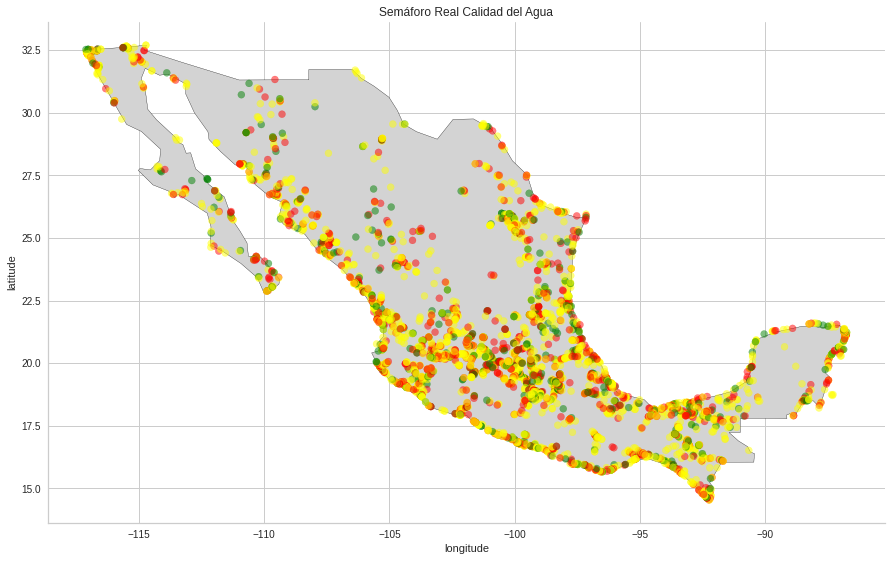

In [65]:
kmeans2 = KMeans(n_clusters = 3, random_state = 42).fit(X_Coordenadas_blobs, Y_blobs)
centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.predict(X_Coordenadas_blobs)

C2 = kmeans2.cluster_centers_

C2df = pd.DataFrame(C2)
C2df["Coordinates"] = list(zip(C2df[0], C2df[1]))
C2df["Coordinates"] = C2df["Coordinates"].apply(Point)


gdf_C_superficiales_2 = gpd.GeoDataFrame(C2df, geometry = "Coordinates")

fig, gax = plt.subplots(figsize=(15,10))

colores2 = ['green','red','yellow']

color_asig2 = []

for row in labels2:
  color_asig2.append(colores2[row])


mundo.query("name == 'Mexico'").plot(ax = gax, edgecolor = 'black', color = 'lightGray')


gdfSuperficiales.plot(ax = gax, color = color_asig2, alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Semáforo Real Calidad del Agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

En este fragmento de código, dibujamos los cuerpos de agua con su valor de semáforo actual para representar.

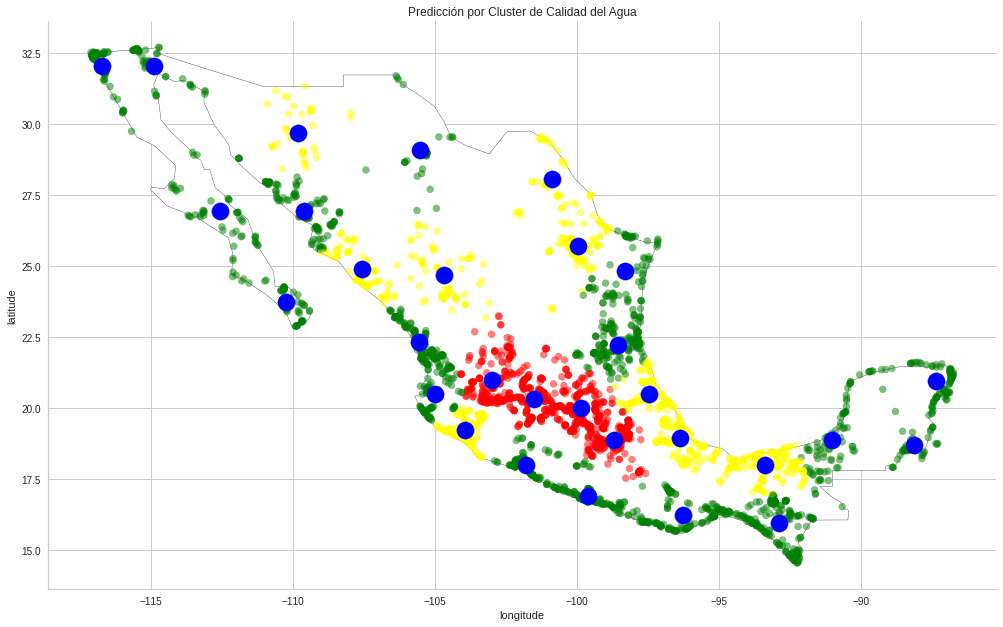

In [66]:
fig, gax = plt.subplots(figsize = (17, 17))

colores = []
color_asig = []

# Verde 2
# Rojo 1
# Amarillo 0
for numeros in promediosContaminacionSemaforo:
  if (numeros == 1.0):
    colores.append('red')
  if (numeros == 2.0):
    colores.append('green')
  if (numeros == 0.0):
    colores.append('yellow')    

for row in y_pred:
  color_asig.append(colores[row])

mundo.query("name == 'Mexico'").plot(ax = gax, edgecolor = 'black', color = 'white')

KdfSuperficiales.plot(ax = gax, color = color_asig, alpha = 0.5)
gdfCSuperficiales.plot(ax = gax, color = 'blue', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Predicción por Cluster de Calidad del Agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Se puede obvservar que la relación de la calidad del agua repecto al centro del país presenta cierto grado de contaminación, por lo que la calidad del agua es mala. Para las peninsulas y algunas costas en el pacifico y el golfo la calidad del agua es buena. A medida que algunos cuerpos de agua se acercan un poco al centro se observa que la calidad del agua es media.

En esta sección estaremos graficando la frontera de cada uno de los clusters, para constreñir su radio de congregación perteneciente.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


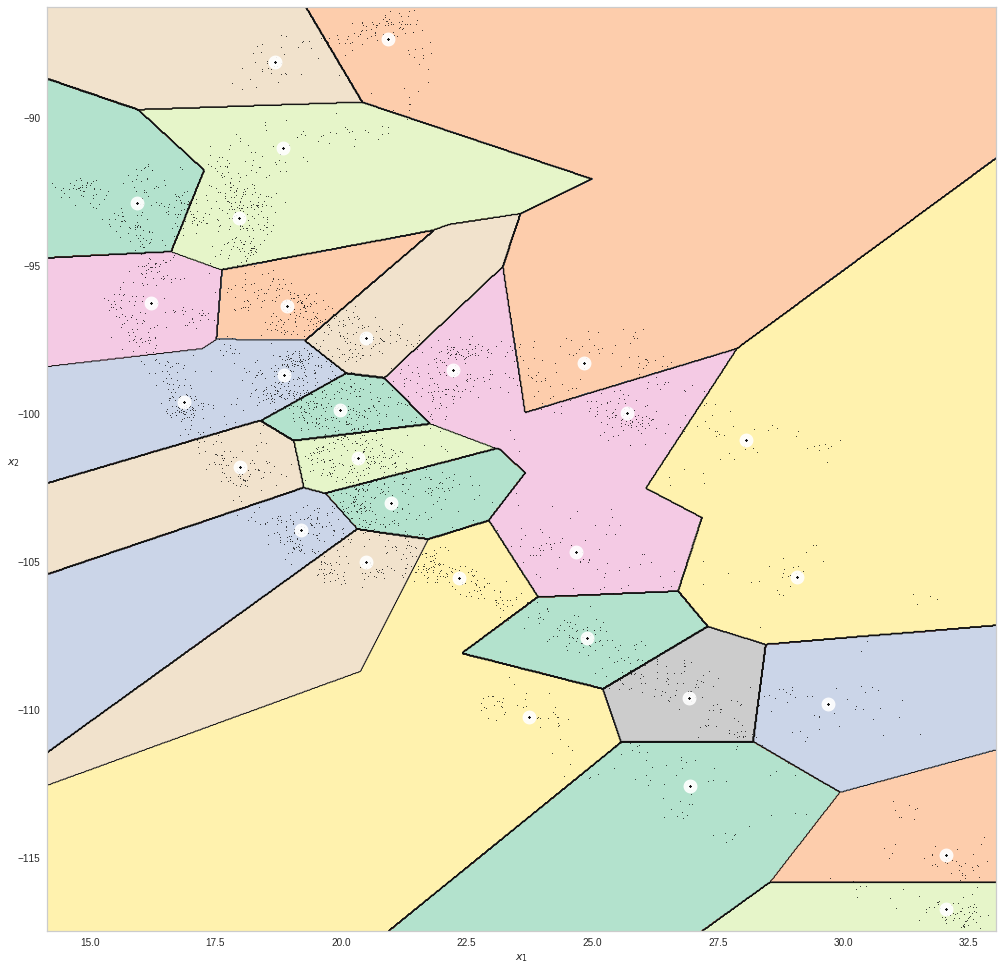

In [67]:
def plotData(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize = 2)

def plotCentroids(centroids, weights = None, circle_color = 'w', cross_color = 'k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker = 'o', s = 35, linewidths = 8,
                color = circle_color, zorder = 10, alpha = 0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker = 'x', s = 2, linewidths = 12,
                color = cross_color, zorder = 11, alpha = 1)

def plotDecisionBoundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis = 0) - 0.1
    maxs = X.max(axis = 0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W = Z

    plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
                cmap = "Pastel2")
    plt.contour(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),
                linewidths = 1, colors = 'k')
    plotData(X)
    if show_centroids:
        plotCentroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(17, 17))
plotDecisionBoundaries(kmeans, X_Coordenadas_blobs)
plt.show()